In [1]:
import numpy as np
import pandas as pd 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('/Users/aarushsingh/Desktop/Data Science/ML/Ridge_Lasso_Elasticnet/Algerian_forest_fires_cleaned_dataset (1).csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [15]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [16]:
##Independent and dependent Features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [17]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [18]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.25,random_state=42)

In [21]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [22]:
y_train.shape,y_test.shape

((182,), (61,))

In [25]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

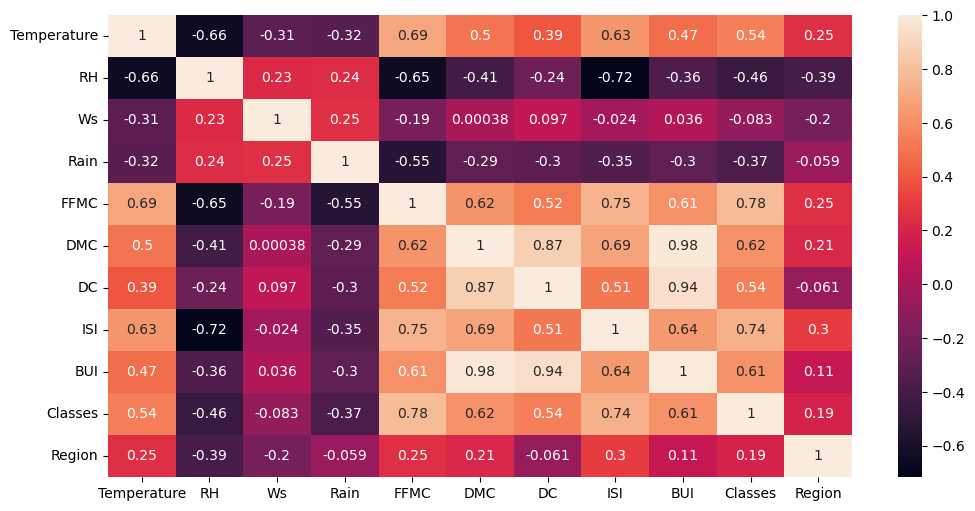

In [26]:
plt.figure(figsize=(12,6))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [37]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
                
    return col_corr
                
            
                

In [40]:
corr_features=correlation(X_train,0.85)

In [41]:
X_train.drop(corr_features,axis=1,inplace=True)

In [43]:
X_test.drop(corr_features,axis=1,inplace=True)

In [46]:
X_test.shape,X_train.shape

((61, 9), (182, 9))

Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [51]:
scaled_X_test,scaled_X_train

(array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
        [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
          6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
         -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
        [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
         -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
         -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
        [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
         -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
         -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
        [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
          1.77377189e-01, -2.677391

/var/folders/6z/qwx8c2z578qgr658p10_c29r0000gn/T/ipykernel_66521/2499873514.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


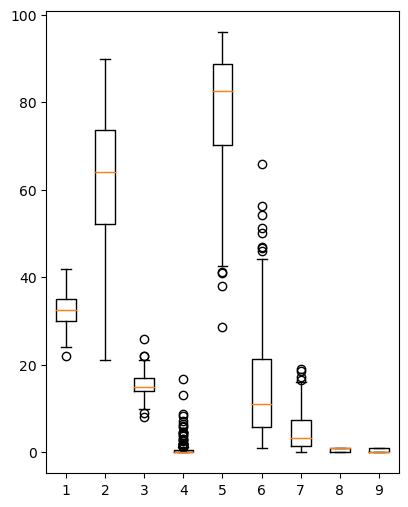

/var/folders/6z/qwx8c2z578qgr658p10_c29r0000gn/T/ipykernel_66521/2499873514.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


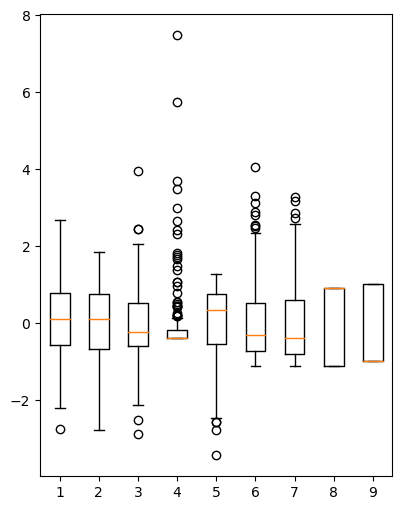

In [66]:
#boxplot to under the Scaler
#boxplot to under the Scaler
plt.subplots(figsize=(10,6))
plt.subplot(1,2,2)
plt.boxplot(x=X_train)
plt.show()
plt.subplots(figsize=(10,6))
plt.subplot(1,2,2)
plt.boxplot(x=scaled_X_train)
plt.show()

Mean absolute error 0.5468236465249977
R2 Score 0.9847657384266951


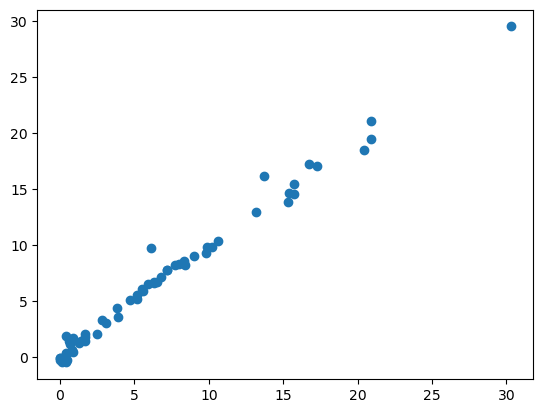

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(scaled_X_train,y_train)
y_pred=linreg.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


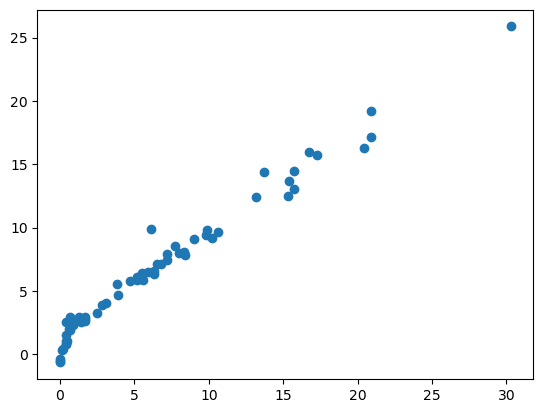

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(scaled_X_train,y_train)
y_pred=lasso.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


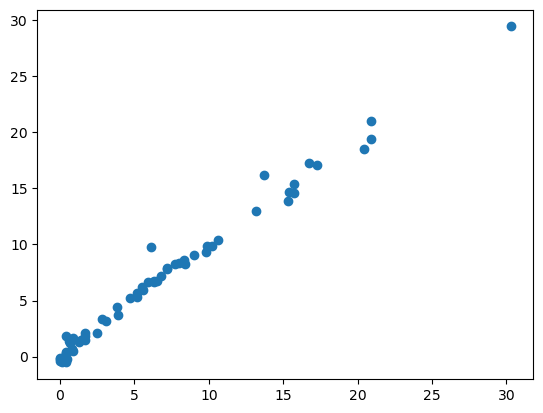

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rigreg = Ridge()
rigreg.fit(scaled_X_train,y_train)
y_pred=rigreg.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


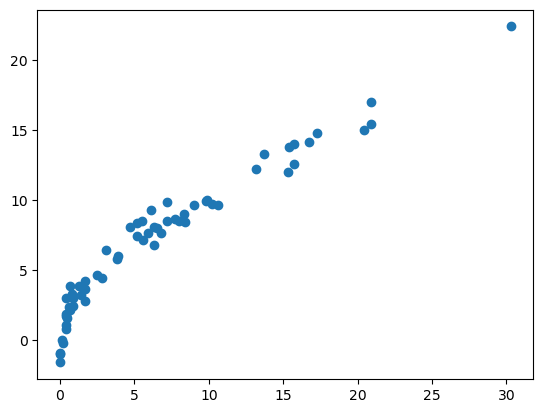

In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic = ElasticNet()
elastic.fit(scaled_X_train,y_train)
y_pred=elastic.predict(scaled_X_test)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [77]:
from sklearn.linear_model import LassoCV
lasscv = LassoCV(cv=5)


Mean absolute error 0.619970115826343
R2 Score 0.9820946715928275


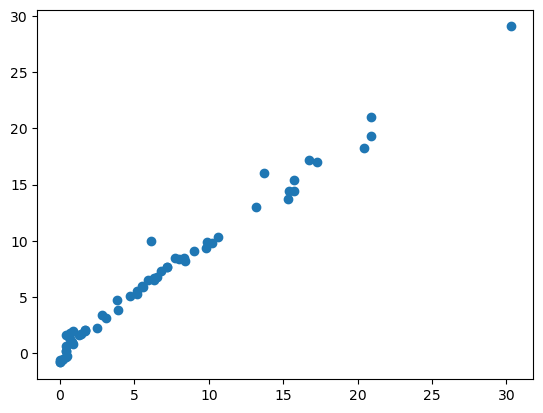

In [80]:
lasscv.fit(scaled_X_train,y_train)
y_pred=lasscv.predict(scaled_X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


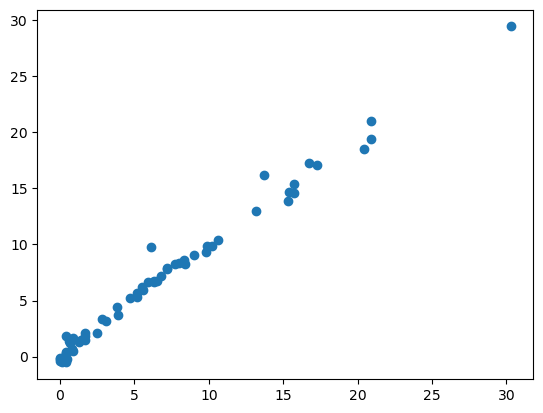

In [82]:
from sklearn.linear_model import RidgeCV
cv = RidgeCV(cv=5)
cv.fit(scaled_X_train,y_train)
y_pred=cv.predict(scaled_X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


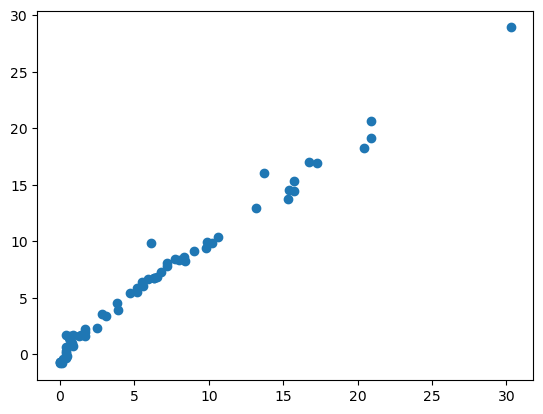

In [83]:
from sklearn.linear_model import ElasticNetCV
cv = ElasticNetCV(cv=5)
cv.fit(scaled_X_train,y_train)
y_pred=cv.predict(scaled_X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [88]:
cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}